In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [122]:
URL = "https://www.atptour.com/en/rankings/singles"
URL_TOP_500 = "https://www.atptour.com/en/rankings/singles?rankRange=0-500"

# Send an HTTP request to the URL
response = requests.get(URL_TOP_500, headers={'User-Agent': ''})
if response.status_code != 200:
    raise Exception(f"Failed to load page {URL}: {response.status_code}")

soup = BeautifulSoup(response.content, "html.parser")

In [123]:
# Initialize a list to store player data
players_data = []

# Iterate over all rows with class 'lower-row'
for row in soup.find_all('tr'):
    # Extract the rank
    rank_cell = row.find('td', class_='rank bold heavy tiny-cell')
    rank = rank_cell.text.strip() if rank_cell else None

    # Extract the player name
    name_li = row.find('li', class_='name center')
    name = name_li.find('span').text.strip() if name_li else None

    # Extract the nationality
    flag_svg = row.find('svg', class_='atp-flag')
    if flag_svg and flag_svg.find('use'):
        flag_code = flag_svg.find('use')['href'].split('#')[-1].split('-')[-1].lower()
        nationality = flag_code.upper()  # Map this to a country name if needed
    else:
        nationality = None

    # Extract the ATP code from the player's link
    player_link = name_li.find('a')['href'] if name_li and name_li.find('a') else None
    atp_code = player_link.split('/')[-2] if player_link else None

    # Extract the age
    age_cell = row.find('td', class_='age small-cell')
    age = age_cell.text.strip() if age_cell else None

    # Extract the points and remove commas before converting to an integer
    points_cell = row.find('td', class_='points center bold extrabold small-cell')
    points = points_cell.text.strip() if points_cell else None
    if points:
        points = points.replace(',', '')  # Remove commas
        points = int(points)

    # Append player data to the list
    if rank and name and age and points:
        players_data.append({
            'rank': int(rank),
            'name': name,
            'age': int(age),
            'points': points,
            'nationality': nationality,
            'atp_code': atp_code
        })

# Convert the list of players to a Pandas DataFrame
players_df = pd.DataFrame(players_data)

In [124]:
players_df

,rank,name,age,points,nationality,atp_code
0,1,Jannik Sinner,23,11830,ITA,s0ag
1,2,Alexander Zverev,27,7915,GER,z355
2,3,Carlos Alcaraz,21,7010,ESP,a0e2
3,4,Taylor Fritz,27,5100,USA,fb98
4,5,Daniil Medvedev,28,5030,RUS,mm58
...,...,...,...,...,...,...
495,496,Michiel De Krom,26,79,NED,dh55
496,497,Andrew Paulson,23,78,CZE,p0ev
497,498,Tyler Zink,23,78,USA,z0ak
498,499,Patrick Maloney,24,78,USA,m0re


In [142]:
#players_df.to_csv('../data/players_data.csv', index=False, mode='w+')

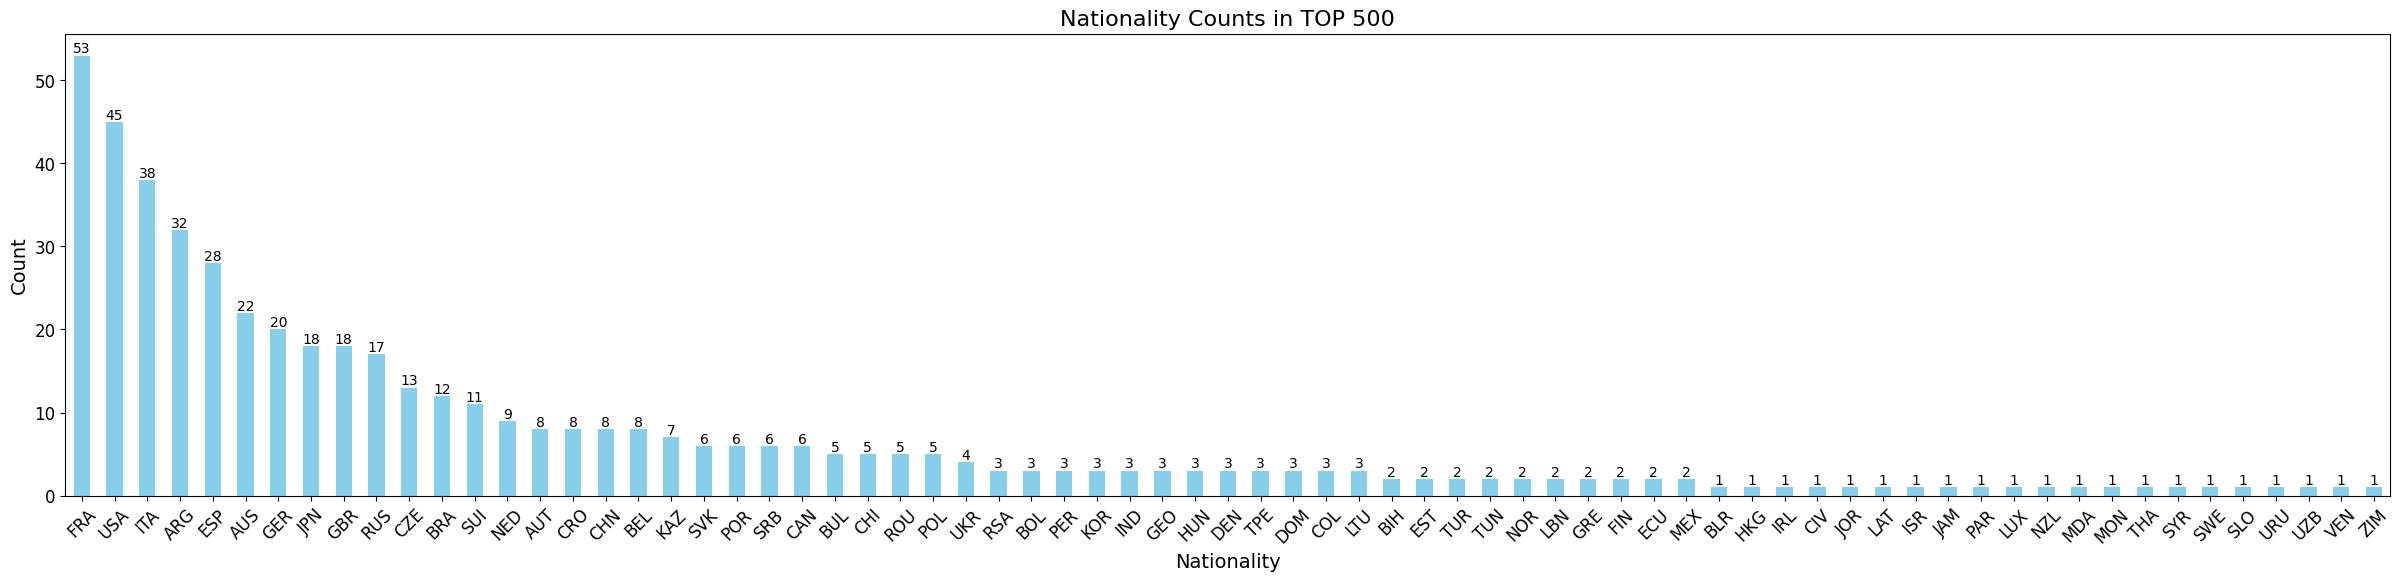

nationality
FRA    10.6
USA     9.0
ITA     7.6
ARG     6.4
ESP     5.6
AUS     4.4
GER     4.0
JPN     3.6
GBR     3.6
RUS     3.4
Name: proportion, dtype: float64

In [146]:
import matplotlib.pyplot as plt

# Plot the data
ax = players_df.value_counts("nationality").plot(kind="bar", figsize=(30, 6), color='skyblue')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Get the bar height (value)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position: center of bar, top of bar
                ha='center', va='bottom', fontsize=10, color='black')  # Alignment and styling

# Add labels and title
plt.title("Nationality Counts in TOP 500", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()
players_df.value_counts("nationality", normalize=True).head(10) * 100

# Helpers

In [ ]:
ranks = {}
for row in soup.find_all('tr'):
    rank = row.find('td', class_='rank bold heavy tiny-cell')
    name_container = row.find('li', class_='name')
    age = row.find('td', class_='age')
    points = row.find('td', class_='points center bold extrabold small-cell')

    if rank and name_container and age and points:
        rank_text = rank.text.strip()
        name = name_container.find('span').text.strip()
        age_text = age.text.strip()
        points_text = points.text.strip()
        if rank_text.isdigit():
            ranks[int(rank_text)] = {'name': name, 'age': age_text, 'points': points_text}

In [105]:
ranks[1]

{'name': 'Jannik Sinner', 'age': '23', 'points': '11,830'}

In [94]:
row.find('td', class_='rank bold heavy tiny-cell')

<td class="rank bold heavy tiny-cell" colspan="1">100</td>

In [93]:
row.find('li', class_='name')

<li class="name center">
<a href="/en/players/mattia-bellucci/b0gg/overview">
<span>Mattia Bellucci</span>
</a>
</li>

In [90]:
row.find('td', class_='age')

<td class="age small-cell" colspan="2">23</td>